In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#Importing keras libraries and packages

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


#Train and Test data path

In [5]:
train_path = "/content/drive/MyDrive/Portfolio 2/Dataset/train/train"
test_path = "/content/drive/MyDrive/Portfolio 2/Dataset/test"

#Importing PIL library for image 

In [6]:
from PIL import Image

# Checking the train path

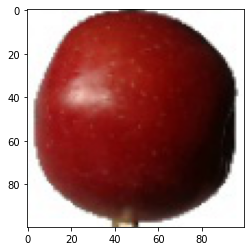

In [7]:
from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img
img = load_img(train_path + "/Apple Braeburn/Apple Braeburn_0.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

#Checking the testing path

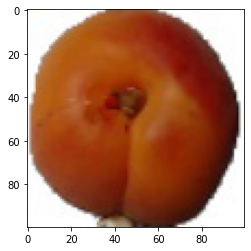

In [8]:
img1 = load_img(test_path + "/test/0000.jpg")
plt.imshow(img1)
plt.axis("on")
plt.show()

# Checking the dimension of the images

In [ ]:
img = img_to_array(img)
img.shape

(100, 100, 3)

# There are total 33 types of fruits in this dataset. Map them and print them accordingly

In [9]:
Name=[]
for file in os.listdir(train_path):
    Name+=[file]
    
fruit_map = dict(zip(Name, [t for t in range(len(Name))]))
print(fruit_map)
r_fruit_map=dict(zip([t for t in range(len(Name))],Name)) 

{'Pineapple': 0, 'Pomegranate': 1, 'Watermelon': 2, 'Potato Red': 3, 'Pepper Red': 4, 'Tomato': 5, 'Strawberry': 6, 'Raspberry': 7, 'Plum': 8, 'Pepper Green': 9, 'Orange': 10, 'Mango': 11, 'Limes': 12, 'Lemon': 13, 'Passion Fruit': 14, 'Pear': 15, 'Onion White': 16, 'Papaya': 17, 'Peach': 18, 'Kiwi': 19, 'Grape Blue': 20, 'Corn': 21, 'Clementine': 22, 'Cucumber Ripe': 23, 'Cantaloupe': 24, 'Cactus fruit': 25, 'Banana': 26, 'Blueberry': 27, 'Cherry': 28, 'Avocado': 29, 'Apricot': 30, 'Apple Granny Smith': 31, 'Apple Braeburn': 32}


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras

In [13]:
data_dir = (r"/content/drive/MyDrive/Portfolio 2/Dataset/train/train")

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size= (100, 100),
    batch_size= 32

  )

Found 16854 files belonging to 33 classes.
Using 13484 files for training.


In [15]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']


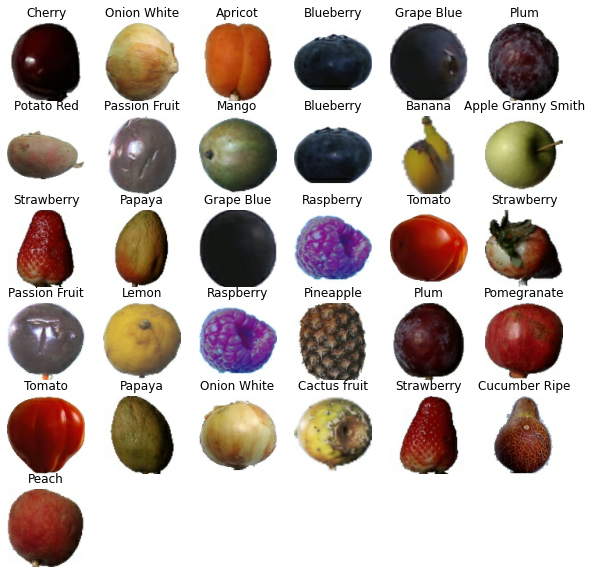

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(31):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#Split the images into train, validation, test sets



##Perform data augmentation by using ImageDataGenerator so that we can acquire more relevant data from the existing images by making minor alterations to the dataset.

In [ ]:
img_datagen = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)
                                
test_datagen = ImageDataGenerator(rescale=1./255)

#Divide the training dataset into train set and validation set.Divide the training dataset into train set and validation set.

In [ ]:
train_generator = img_datagen.flow_from_directory(train_path,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

valid_generator = img_datagen.flow_from_directory(train_path,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


In [ ]:
for i in train_generator.class_indices:
  print(i, train_generator.class_indices[i])

Apple Braeburn 0
Apple Granny Smith 1
Apricot 2
Avocado 3
Banana 4
Blueberry 5
Cactus fruit 6
Cantaloupe 7
Cherry 8
Clementine 9
Corn 10
Cucumber Ripe 11
Grape Blue 12
Kiwi 13
Lemon 14
Limes 15
Mango 16
Onion White 17
Orange 18
Papaya 19
Passion Fruit 20
Peach 21
Pear 22
Pepper Green 23
Pepper Red 24
Pineapple 25
Plum 26
Pomegranate 27
Potato Red 28
Raspberry 29
Strawberry 30
Tomato 31
Watermelon 32


#Training the model

###step1 Initializing CNN

In [ ]:
model = Sequential()

### step2 adding 1st Convolution layer and Pooling layer

In [ ]:
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### step3 adding 2nd convolution layer and polling layer

In [ ]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

##Adding 3rd convolution layer and polling layer

In [ ]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

##Adding 4th convolution layer and polling layer

In [ ]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

##Adding 5th convolution layer and polling layer

In [ ]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

##Adding 6th convolution layer and polling layer

In [ ]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

##step4 Flattening the layers

In [ ]:
model.add(Flatten())

##step5 Full_Connection

In [ ]:
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(fruit_map), activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 64)      

#Compile and fit the model

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_generator, validation_data=valid_generator,
                   steps_per_epoch=train_generator.n//train_generator.batch_size,
                   validation_steps=valid_generator.n//valid_generator.batch_size,
                   epochs=10)

Epoch 1/10
421/421 [==============================] - 3038s 7s/step - loss: 2.2317 - accuracy: 0.2602 - val_loss: 1.0837 - val_accuracy: 0.6024
Epoch 2/10
421/421 [==============================] - 100s 237ms/step - loss: 0.8235 - accuracy: 0.6859 - val_loss: 0.3204 - val_accuracy: 0.8869
Epoch 3/10
421/421 [==============================] - 99s 234ms/step - loss: 0.4119 - accuracy: 0.8535 - val_loss: 0.2102 - val_accuracy: 0.9304
Epoch 4/10
421/421 [==============================] - 99s 234ms/step - loss: 0.2601 - accuracy: 0.9103 - val_loss: 0.2101 - val_accuracy: 0.9268
Epoch 5/10
421/421 [==============================] - 98s 232ms/step - loss: 0.1962 - accuracy: 0.9361 - val_loss: 0.0881 - val_accuracy: 0.9679
Epoch 6/10
421/421 [==============================] - 97s 232ms/step - loss: 0.1465 - accuracy: 0.9509 - val_loss: 0.1037 - val_accuracy: 0.9571
Epoch 7/10
421/421 [==============================] - 98s 232ms/step - loss: 0.1202 - accuracy: 0.9616 - val_loss: 0.1160 - val_ac

#Loss and accuracy graphs

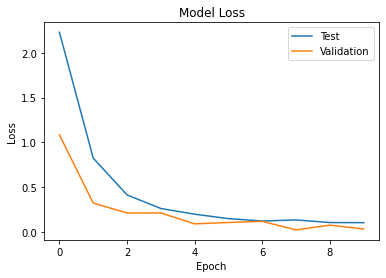

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

#Load the image and convert it to appropriate size

In [ ]:
image=load_img("/content/drive/MyDrive/Portfolio 2/Dataset/test/test/0098.jpg",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

#Predicting a fruit from the test set

In [ ]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
#move_name=mapper(value)
print("Prediction is {}.".format(value))

Prediction is 31.
